In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        """
        初始化 KMeans 类

        参数:
        k: 聚类数量
        max_iters: 最大迭代次数
        tol: 容忍度，用于判断质心是否不再移动
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.centroids_history = []

    def distEclu(self, arrA, arrB):
        """
        计算欧氏距离的平方和

        参数:
        arrA: 数据点
        arrB: 质心

        返回:
        欧氏距离的平方和
        """
        dist = np.sum((arrA - arrB) ** 2, axis=1)
        return dist

    def randCent(self, dataset):
        """
        随机初始化质心

        参数:
        dataset: 数据集

        返回:
        初始化的质心
        """
        n = dataset.shape[1]  # 特征有多少列
        data_min = dataset.iloc[:, :n].min()  # 每一列的最小值
        data_max = dataset.iloc[:, :n].max()  # 每一列的最大值
        data_cent = np.random.uniform(data_min, data_max, (self.k, n))  # 参数：最小值,最大值,shape形状。
        # 返回生成的质心
        return data_cent

    def closest_centroid(self, X):
        """
        找到每个点最近的质心

        参数:
        X: 数据集

        返回:
        每个点最近的质心的索引
        """
        distances = np.array([self.distEclu(X, centroid) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

    def update_centroids(self, X, labels):
        """
        更新质心位置

        参数:
        X: 数据集
        labels: 点的标签

        返回:
        新的质心位置
        """
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        """
        执行 K-means 聚类

        参数:
        X: 数据集
        """
        self.centroids = self.randCent(X)
        self.centroids_history.append(self.centroids.copy())
        for i in range(self.max_iters):
            self.labels = self.closest_centroid(X)
            new_centroids = self.update_centroids(X, self.labels)
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids
            self.centroids_history.append(self.centroids.copy())

    def predict(self, X):
        """
        预测数据点的簇

        参数:
        X: 数据集

        返回:
        数据点的簇标签
        """
        return self.closest_centroid(X)


将其应用

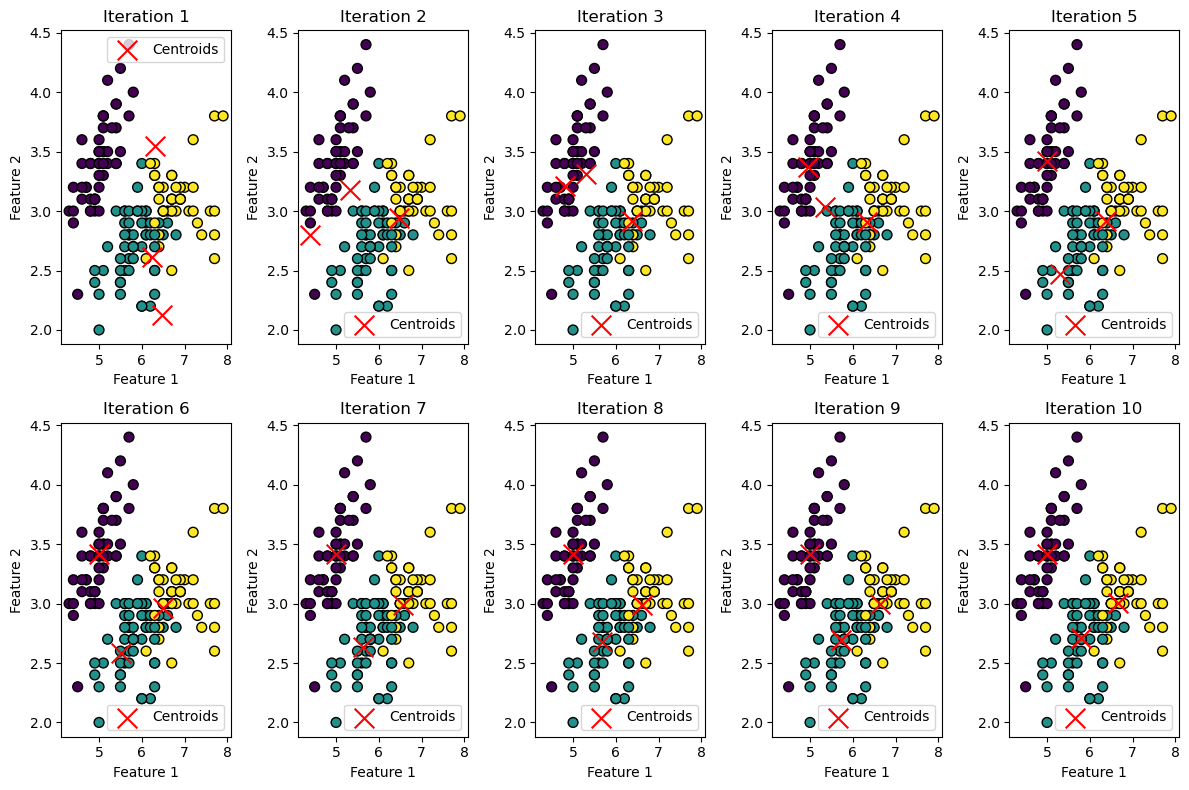

最终簇: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
质心位置: [[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


In [33]:
# 读取数据文件
file_path = "D:\\QG训练\\小组\\week2\\kmeans代码及实现\\iris.txt"
data = pd.read_csv(file_path, header=None)

# 提取特征数据
X = data.iloc[:, :-1]

# 运行 K-means
kmeans = KMeans(k=3)
kmeans.fit(X)

# 获取质心历史记录
centroids_history = kmeans.centroids_history

# 绘制质点变化的各个图
max_plots = 10  # 最多绘制 10 次迭代
num_plots = min(len(centroids_history), max_plots)
rows = 2
cols = 5

plt.figure(figsize=(12, 8))

for i, centroids in enumerate(centroids_history[:num_plots]):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title(f'Iteration {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

plt.tight_layout()
plt.show()

# 打印最终簇和质心位置
print("最终簇:", kmeans.labels)
print("质心位置:", kmeans.centroids)